### Load libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [2]:

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Combine customer and transaction data

In [3]:
customer_data = pd.merge(customers, transactions, on='CustomerID').groupby('CustomerID').agg({
    'Region': 'first',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

### Encode categorical data (e.g., Region)

In [4]:
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


### Normalize the data


In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_data.drop(columns=['CustomerID']))

# Apply clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
customer_data['Cluster'] = clusters

# Evaluate clustering
db_index = davies_bouldin_score(data_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.9475622901515466


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualize clusters using PCA

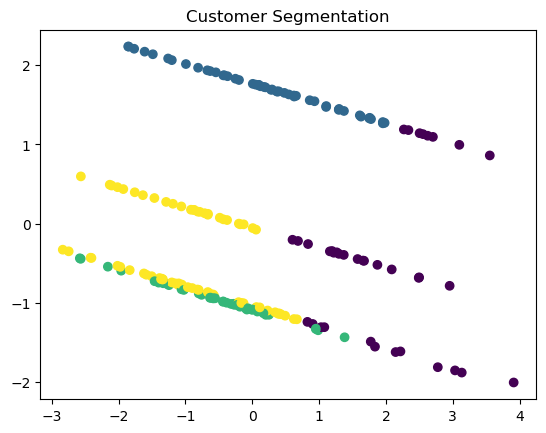

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segmentation')
plt.show()

# Save clustering results
customer_data.to_csv('Yash_Sonar_Clustering.csv', index=False)